In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L63_clvs/noisy_state/State')

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

spr=1
dt=0.01   
t_start=0
t_stop=5000

model_dim=3
model_name='L63'
base_type='State'
num_clv=3
coord=['X','Y','Z']

In [3]:
C=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L63_clvs/noisy_state/State')
start_idx=35000 # starting point of the interval of clv( 25000+10000)
base_traj=np.load('State_g={}.npy'.format(dt))[start_idx:start_idx+t_stop]
print(C.shape)
print(G.shape)
print(base_traj.shape)

(5000, 3, 3)
(5000, 3, 3)
(5000, 3)


In [4]:
V=np.zeros_like(G)
for i in range(G.shape[0]):
    V[i]=G[i]@C[i]    

In [5]:
base_type1='Analysis'
mu=1.0
os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L63_clvs/noisy_state/Analysis')
C1=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type1))[t_start:t_stop]
G1=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type1))[t_start:t_stop]
analysis=np.load('Analysis_mean_g={}_mu={}.npy'.format(dt,mu))[start_idx+t_start:start_idx+t_stop]

In [6]:
V1=np.zeros_like(G)
for i in range(G1.shape[0]):
    V1[i]=G1[i]@C1[i]  

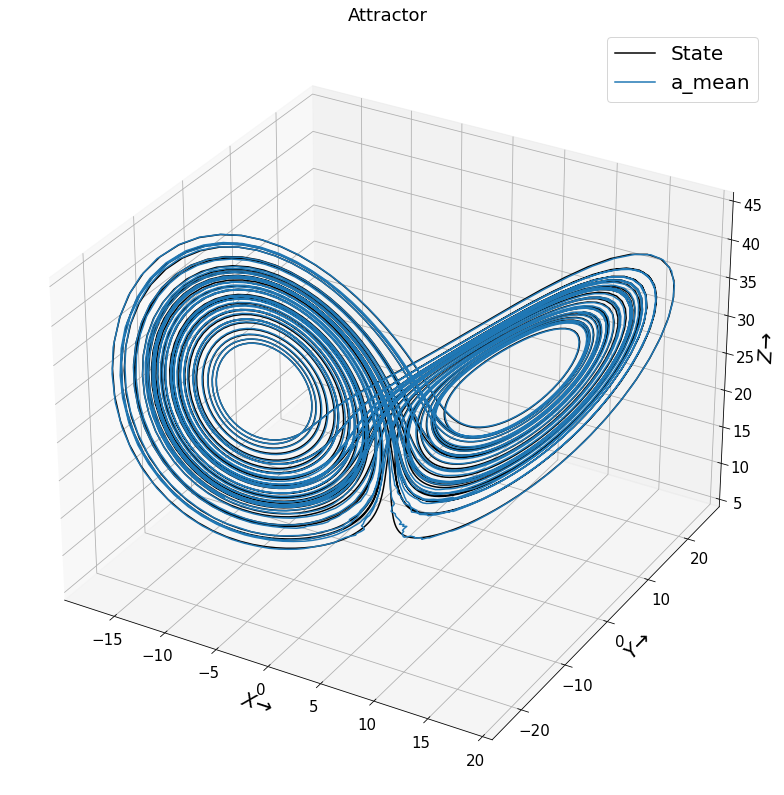

In [7]:
fig = plt.figure(figsize=(14,14))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(base_traj[:,0],base_traj[:,1],base_traj[:,2],label='{}'.format(base_type),c='black')
ax.plot3D(analysis[:,0],analysis[:,1],analysis[:,2],label='a_mean')
ax.set_title('Attractor',fontsize=18)
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
plt.legend()
plt.savefig('truth_and_analysis.png')

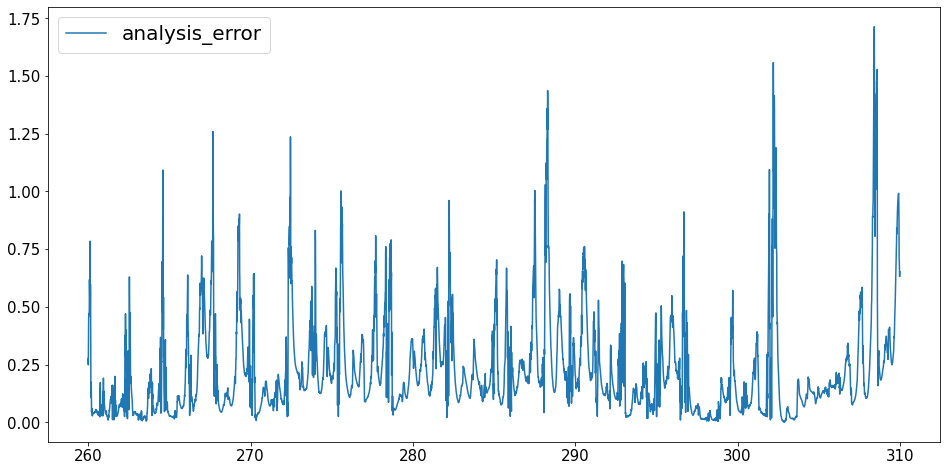

In [8]:
# le error between the forecast and the analysis
plt.figure(figsize=(16,8))
plt.plot(0.01*np.arange(base_traj.shape[0])+260,np.linalg.norm(base_traj-analysis,axis=1),label='analysis_error')
plt.legend()
plt.savefig('analysis_error.png')

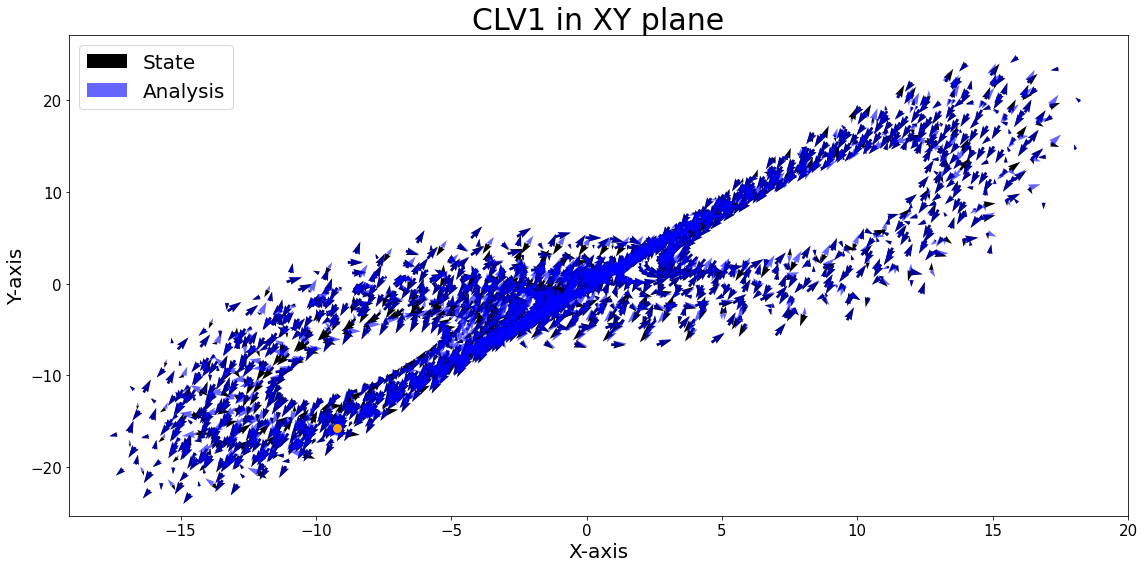

In [29]:
# Plot the two at same clv index
num_clv=1
spr=2
plot_pairs=[[0,1]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V[::spr,l,clv_index],V[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='{}'.format(base_type))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V1[::spr,l,clv_index],V1[::spr,m,clv_index],scale_units='xy',scale=1.0,color='blue',label='{}'.format(base_type1),alpha=0.6)        
        ax.scatter(base_traj[0,l],base_traj[0,m],c='orange',s=100,edgecolors='blue')
        #ax.scatter(traj[0,l],traj1[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('CLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

In [20]:
# Looking at dot product between clv
# To check, average errors over the interval for which clv is calculated. And the cosine of the angle between them
# and the 
l2_error=np.arange(base_traj.shape[0])
l2_error=np.linalg.norm(analysis-base_traj,axis=1)
cosines=np.zeros((base_traj.shape[0],3))
for i in range(base_traj.shape[0]):
    for j in range(3):
        cosines[i,j]=np.absolute(np.dot(V[i,:,j],V1[i,:,j]))

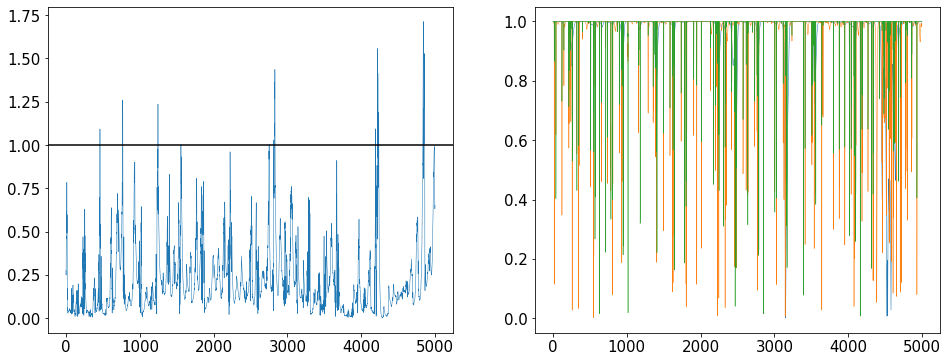

In [25]:
ob_dim=1
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(l2_error)),l2_error,lw=0.5)
plt.axhline(y=np.sqrt(mu*ob_dim),c='black')
plt.subplot(1,2,2)
plt.plot(np.arange(len(l2_error)),cosines,lw=0.5)

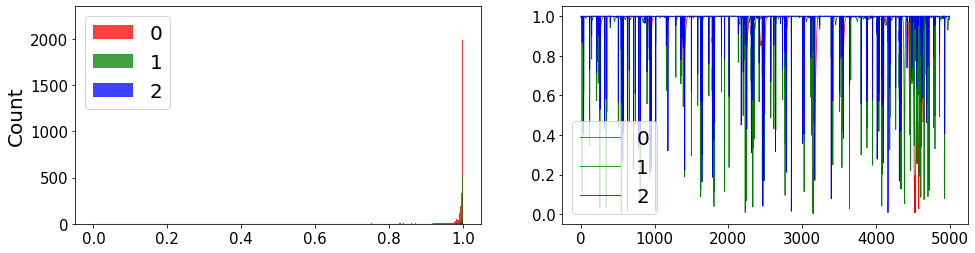

In [50]:
# KDE plot
plt.figure(figsize=(16,4))
colors=['r','g','b']
plt.subplot(1,2,1)
for i in range(3):
    sns.histplot(x=cosines[:,i],fill=True,color=colors[i],label='{}'.format(i))

plt.legend()
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(np.arange(len(l2_error)),cosines[:,i],label='{}'.format(i),lw=0.8,c=colors[i])
plt.legend()

In [183]:
np.random.multivariate_normal(np.zeros(3),np.eye(3),10)

10

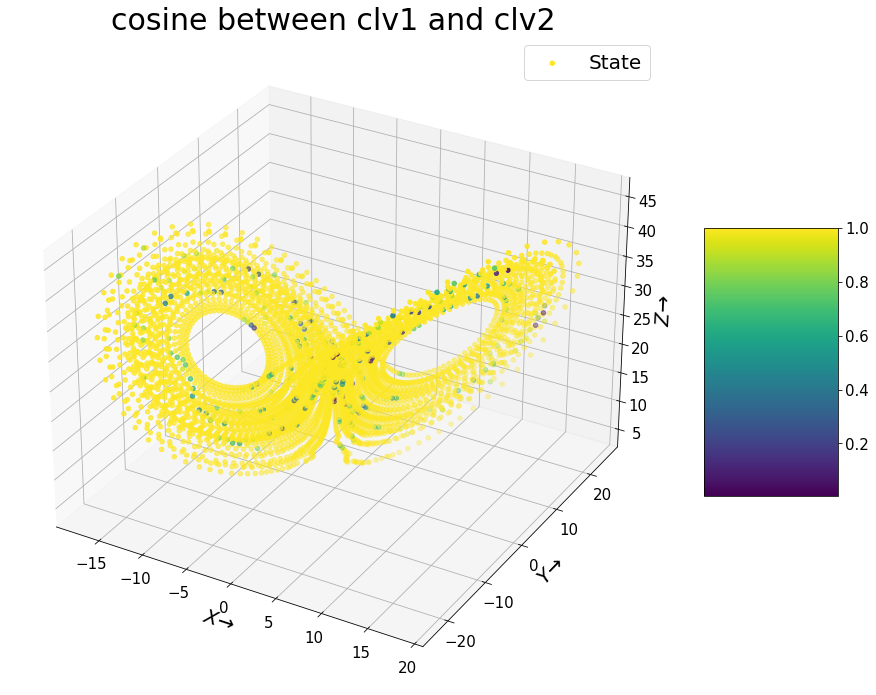

In [46]:
#plot the state and the trajectory
fig = plt.figure(figsize=(16,12))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(analysis[:,0],analysis[:,1],analysis[:,2],c=cosines[:,2],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
ax.set_title('cosine between clv{} and clv{}'.format(1,2))
fig.colorbar(my_scatter,shrink=1.0, aspect=2)
plt.legend()

In [11]:
#Lorenz-63 with default values: sigma=10, rho=28, beta=8/3
def L63(x,sigma=10.,rho=28.,beta=8./3):
    "Function to be used for compuation of ode in scipy.integrate.solve_ivp"
    return np.array([sigma*(x[1]-x[0]),x[0]*(rho-x[2])-x[1],x[0]*x[1]-beta*x[2]])

In [13]:
cosines_flow_clv=np.zeros((base_traj.shape[0],3))
for i in range(base_traj.shape[0]):
    for j in range(3):
        cosines_flow_clv[i,j]=np.dot(V1[i,:,j],L63(analysis[i]))

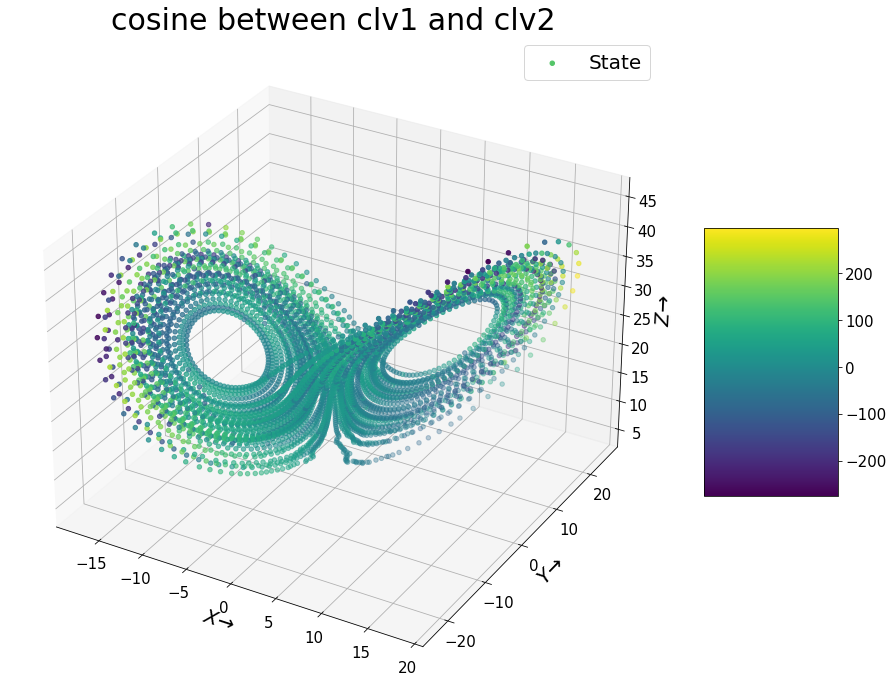

In [14]:
# Regime change in L63, by using CLVs
#plot the state and the trajectory
fig = plt.figure(figsize=(16,12))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(analysis[:,0],analysis[:,1],analysis[:,2],c=cosines_flow_clv[:,0],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
ax.set_title('cosine between clv{} and clv{}'.format(1,2))
fig.colorbar(my_scatter,shrink=1.0, aspect=2)
plt.legend()